<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [ ]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head(-1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


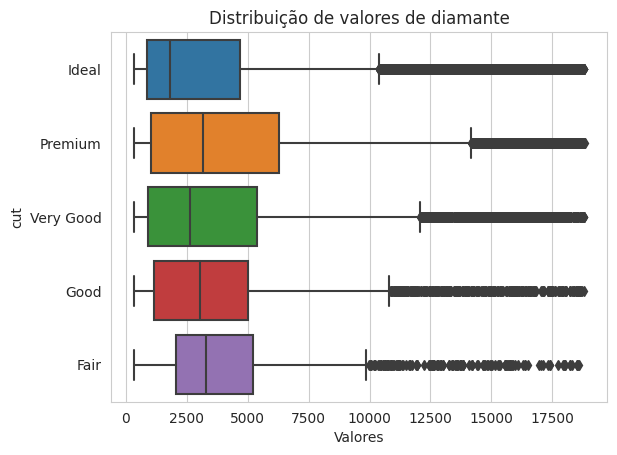

In [ ]:
# gráfico do exercício 1

with sns.axes_style('whitegrid'):
  diamonds = sns.boxplot(x=data['price'], y=data['cut'])
  diamonds.set(title='Distribuição de valores de diamante', xlabel='Valores')

**Insight do gráfico 1**:
O gráfico escolhido foi o boxplot pois ele mostra que a grnade cconcentração de valores dos diamantes se encontra entre, aproximadamente 1000 e aproximadamente 6000, os valores outliers se encontram a partir de 10000 independente do tipo de corte do diamante

---

## 2\. Correlação entre o preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [ ]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head(-1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


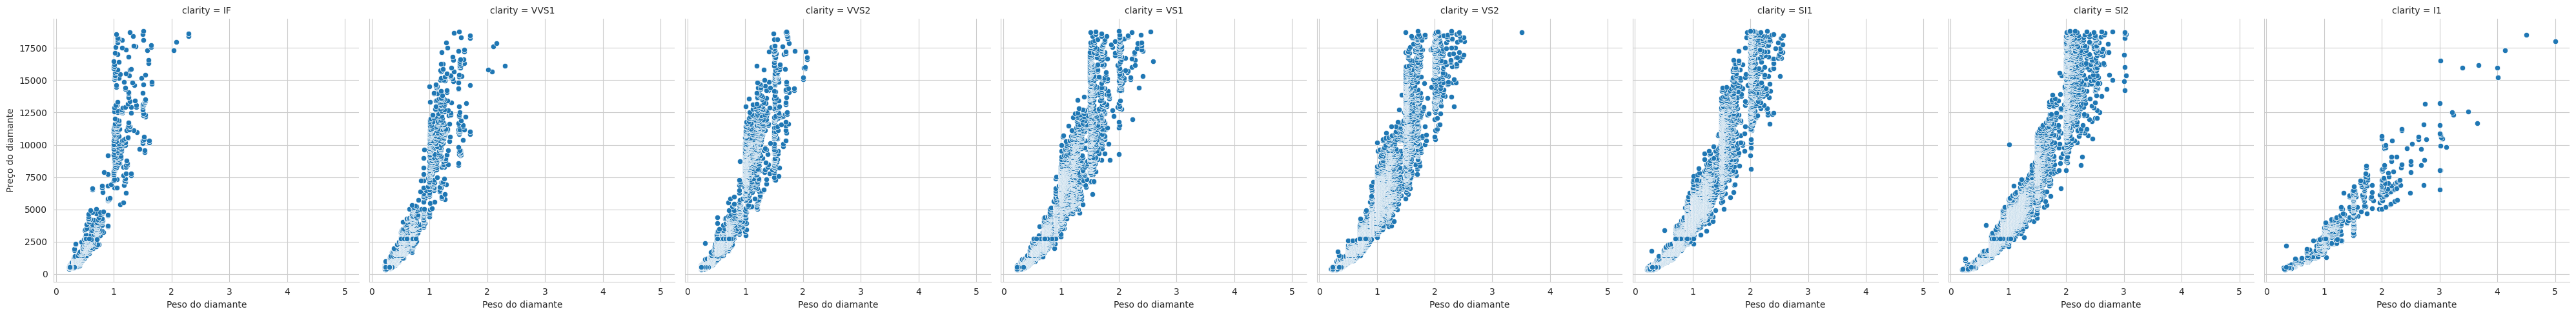

In [ ]:
# gráfico do exercício 2
diamantes = data[["carat","price","clarity"]]
#diamantes = diamantes.query("price < 5000")

with sns.axes_style('whitegrid'):
  grafico = sns.relplot(data=diamantes, x="carat", y="price", col="clarity")
  grafico.set(xlabel="Peso do diamante", ylabel="Preço do diamante")


/**Insight do gráfico 2**:
Podemos observar que o peso do diamante vai aumentando de acordo com sua claridade.
O diamante de claridade SI2 aparentemente é o que possui os maiores valores e gradativamente os maiores pesos.
Em contrapartida o diamante de claridade I1 é o que está mais variado com as pedras mais pesadas podendo chegar em até 5kg.

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [ ]:
import seaborn as sns

data = sns.load_dataset("mpg")
data.head(-1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950,17.3,82,usa,chevrolet camaro
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage


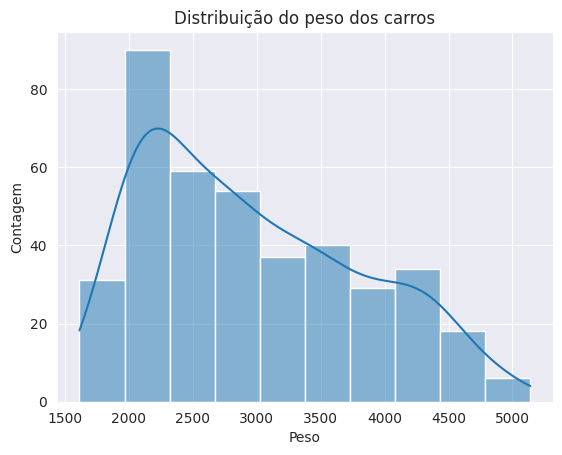

In [ ]:
# gráfico do exercício 3

cars = data[["weight"]]

with sns.axes_style('darkgrid'):

  grafico = sns.histplot(data=cars, x="weight", kde=True)
  grafico.set(title="Distribuição do peso dos carros", xlabel="Peso", ylabel="Contagem");

**Insight do gráfico 3**:
Podemos analisar que a grande maioria dos carros possuem o pesp acima de 2000 e esse numeor vai caindo gradativament, aproximadamente 30 veículo possuem peso na casa de 1500 a 2000 quilos e esse numero se eleva a mais de 80 unidades quando passa dos 2000 quilos

---